<a href="https://colab.research.google.com/github/plaban1981/Hugging_Face_transformers_topics/blob/main/Question_Answering_with_Pretrained_Transformers_Using_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Question Answering using transformer pipeline

In [ ]:
!pip install -q transformers

     |████████████████████████████████| 4.9 MB 34.1 MB/s 
     |████████████████████████████████| 6.6 MB 48.8 MB/s 
     |████████████████████████████████| 120 kB 73.2 MB/s 


In [ ]:
from transformers import pipeline
question_answering = pipeline("question-answering")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/473 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/261M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [ ]:
context = """
Machine learning (ML) is the study of computer algorithms that improve automatically through experience. It is seen as a part of artificial intelligence. Machine learning algorithms build a model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to do so. Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or unfeasible to develop conventional algorithms to perform the needed tasks.
"""

In [ ]:
question = "What are machine learning models based on?"

## Perform Question Answering

In [ ]:
result = question_answering(question=question, context=context)
print("Answer:", result['answer'])
print("Score:", result['score'])

Answer: sample data
Score: 0.8846669793128967


## Question Answering for any Language

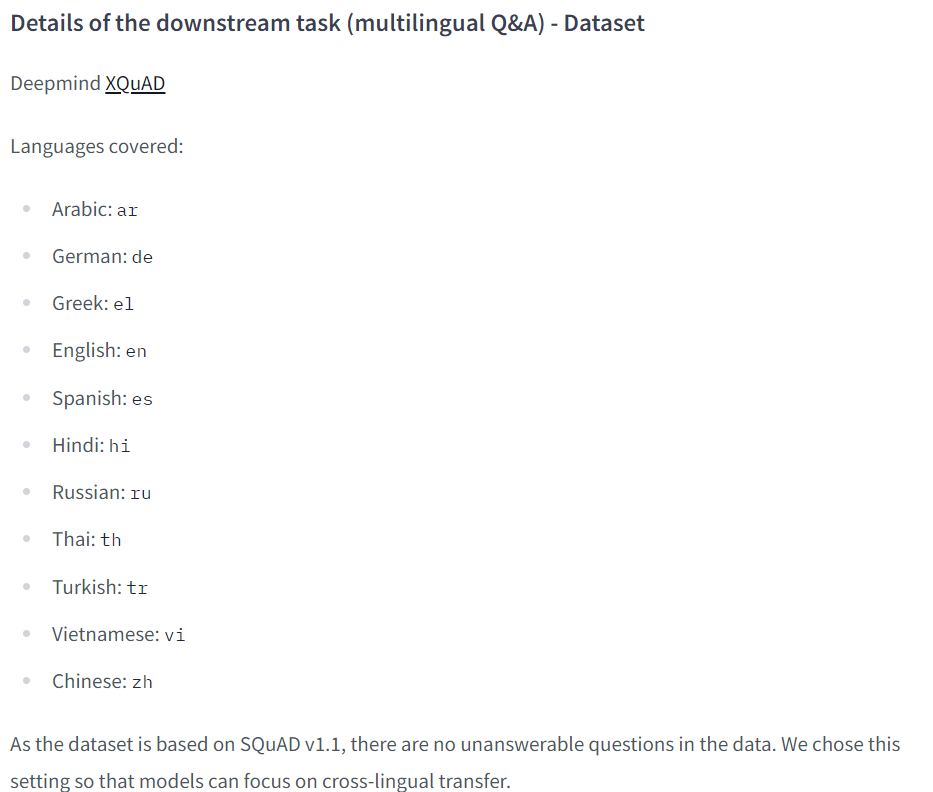

**multilingual BERT**  is trained on the Deepmind’s xQuAD dataset (a multi-lingual version of the SQuAD dataset), which supports 11 languages: Arabic, German, Greek, English, Spanish, Hindi, Russian, Thai, Turkish, Vietnamese, and Chinese.

In [ ]:
from transformers import pipeline

qa_pipeline = pipeline(
    "question-answering",
    model="mrm8488/bert-multi-cased-finetuned-xquadv1",
    tokenizer="mrm8488/bert-multi-cased-finetuned-xquadv1"
)


# context: Coronavirus is seeding panic in the West because it expands so fast.

# question: Where is seeding panic Coronavirus?
output = qa_pipeline({
    'context': "कोरोनावायरस पश्चिम में आतंक बो रहा है क्योंकि यह इतनी तेजी से फैलता है।",
    'question': "कोरोनावायरस घबराहट कहां है?"
    
})
print(output)
# output: {'answer': 'पश्चिम', 'end': 18, 'score': 0.7037217439689059, 'start': 12}

output = qa_pipeline({
    'context': "Manuel Romero has been working hardly in the repository hugginface/transformers lately",
    'question': "Who has been working hard for hugginface/transformers lately?"
    
})
print(output)
# output: {'answer': 'Manuel Romero', 'end': 13, 'score': 0.7254485993702389, 'start': 0}

output = qa_pipeline({
    'context': "Manuel Romero a travaillé à peine dans le référentiel hugginface / transformers ces derniers temps",
    'question': "Pour quel référentiel a travaillé Manuel Romero récemment?"
    
})
print(output)
#output: {'answer': 'hugginface / transformers', 'end': 79, 'score': 0.6482061613915384, 'start': 54}


{'score': 0.9652569890022278, 'start': 12, 'end': 18, 'answer': 'पश्चिम'}
{'score': 0.9790927767753601, 'start': 0, 'end': 13, 'answer': 'Manuel Romero'}
{'score': 0.9209494590759277, 'start': 54, 'end': 79, 'answer': 'hugginface / transformers'}


## Custom Training Question Answer Model Using Transformer BERT

In [ ]:
!pip install -q simpletransformers

     |████████████████████████████████| 250 kB 2.1 MB/s 
     |████████████████████████████████| 6.6 MB 26.1 MB/s 
     |████████████████████████████████| 365 kB 63.8 MB/s 
     |████████████████████████████████| 1.8 MB 54.5 MB/s 
     |████████████████████████████████| 9.1 MB 49.8 MB/s 
     |████████████████████████████████| 1.3 MB 52.6 MB/s 
     |████████████████████████████████| 4.9 MB 57.6 MB/s 
     |████████████████████████████████| 43 kB 2.2 MB/s 
     |████████████████████████████████| 120 kB 69.3 MB/s 
     |████████████████████████████████| 158 kB 24.0 MB/s 
     |████████████████████████████████| 181 kB 70.2 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 157 kB 72.0 MB/s 
     |████████████████████████████████| 157 kB 77.2 MB/s 
     |████████████████████████████████| 157 kB 77.4 MB/s 
     |████████████████████████████████| 157 kB 78.1 MB/s 
     |████████████████████████████████| 157 kB 79.1 MB/s 
     |█████████████

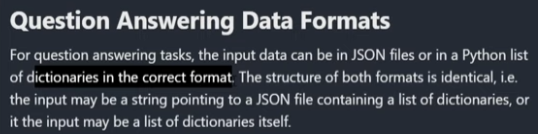

#### Train Data:
Train data can be in the form of a path to a JSON file or a list of dictionaries in the structure specified.

Questions and answers are represented as dictionaries. Each dictionary in qas has the following format.

* id: (string) A unique ID for the question. Should be unique across the entire dataset.
question: (string) A question.
* is_impossible: (bool) Indicates whether the question can be answered correctly from the context.
* answers: (list) The list of correct answers to the question.

A single answer is represented by a dictionary with the following attributes.

* text: (string) The answer to the question. Must be a substring of the context.
* answer_start: (int) Starting index of the answer in the context.

## download input data

In [ ]:
!wget https://raw.githubusercontent.com/krishnaik06/Trnasformer-Bert/main/Cutom%20Question%20Answering/train.json

--2022-09-19 01:40:49--  https://raw.githubusercontent.com/krishnaik06/Trnasformer-Bert/main/Cutom%20Question%20Answering/train.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 897 [text/plain]
Saving to: ‘train.json’

train.json          100%[===================>]     897  --.-KB/s    in 0s      

2022-09-19 01:40:49 (47.2 MB/s) - ‘train.json’ saved [897/897]



In [ ]:
!wget https://raw.githubusercontent.com/krishnaik06/Trnasformer-Bert/main/Cutom%20Question%20Answering/test.json

--2022-09-19 01:41:00--  https://raw.githubusercontent.com/krishnaik06/Trnasformer-Bert/main/Cutom%20Question%20Answering/test.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 838 [text/plain]
Saving to: ‘test.json’

test.json           100%[===================>]     838  --.-KB/s    in 0s      

2022-09-19 01:41:00 (43.1 MB/s) - ‘test.json’ saved [838/838]



In [ ]:
!wget https://raw.githubusercontent.com/krishnaik06/Trnasformer-Bert/main/Cutom%20Question%20Answering/predictions.json

--2022-09-19 01:43:05--  https://raw.githubusercontent.com/krishnaik06/Trnasformer-Bert/main/Cutom%20Question%20Answering/predictions.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 123 [text/plain]
Saving to: ‘predictions.json’

predictions.json    100%[===================>]     123  --.-KB/s    in 0s      

2022-09-19 01:43:05 (7.95 MB/s) - ‘predictions.json’ saved [123/123]



In [ ]:
import json
with open(r"train.json", "r") as read_file:
    train = json.load(read_file)

In [ ]:
train

[{'context': 'Mistborn is a series of epic fantasy novels written by American author Brandon Sanderson.',
  'qas': [{'id': '00001',
    'is_impossible': False,
    'question': 'Who is the author of the Mistborn series?',
    'answers': [{'text': 'Brandon Sanderson', 'answer_start': 71}]}]},
 {'context': 'The first series, published between 2006 and 2008, consists of The Final Empire,The Well of Ascension, and The Hero of Ages.',
  'qas': [{'id': '00002',
    'is_impossible': False,
    'question': 'When was the series published?',
    'answers': [{'text': 'between 2006 and 2008', 'answer_start': 28}]},
   {'id': '00003',
    'is_impossible': False,
    'question': 'What are the three books in the series?',
    'answers': [{'text': 'The Final Empire, The Well of Ascension, and The Hero of Ages',
      'answer_start': 63}]},
   {'id': '00004',
    'is_impossible': True,
    'question': 'Who is the main character in the series?',
    'answers': []}]}]

In [ ]:
with open(r"test.json", "r") as read_file:
    test = json.load(read_file)

In [ ]:
test

[{'context': 'The series primarily takes place in a region called the Final Empire on a world called Scadrial, where the sun and sky are red, vegetation is brown, and the ground is constantly being covered under black volcanic ashfalls.',
  'qas': [{'id': '00001',
    'is_impossible': False,
    'question': 'Where does the series take place?',
    'answers': [{'text': 'region called the Final Empire', 'answer_start': 38},
     {'text': 'world called Scadrial', 'answer_start': 74}]}]},
 {'context': '"Mistings" have only one of the many Allomantic powers, while "Mistborns" have all the powers.',
  'qas': [{'id': '00002',
    'is_impossible': False,
    'question': 'How many powers does a Misting possess?',
    'answers': [{'text': 'one', 'answer_start': 21}]},
   {'id': '00003',
    'is_impossible': True,
    'question': 'What are Allomantic powers?',
    'answers': []}]}]

In [ ]:
import logging

from simpletransformers.question_answering import QuestionAnsweringModel, QuestionAnsweringArgs

In [ ]:
model_type="bert"
model_name= "bert-base-cased"
if model_type == "bert":
    model_name = "bert-base-cased"

elif model_type == "roberta":
    model_name = "roberta-base"

elif model_type == "distilbert":
    model_name = "distilbert-base-cased"

elif model_type == "distilroberta":
    model_type = "roberta"
    model_name = "distilroberta-base"

elif model_type == "electra-base":
    model_type = "electra"
    model_name = "google/electra-base-discriminator"

elif model_type == "electra-small":
    model_type = "electra"
    model_name = "google/electra-small-discriminator"

elif model_type == "xlnet":
    model_name = "xlnet-base-cased"

In [ ]:
# Configure the model 
model_args = QuestionAnsweringArgs()
model_args.train_batch_size = 16
model_args.evaluate_during_training = True
model_args.n_best_size=3
model_args.num_train_epochs=5

In [ ]:
### Advanced Methodology
train_args = {
    "reprocess_input_data": True,
    "overwrite_output_dir": True,
    "use_cached_eval_features": True,
    "output_dir": f"outputs/{model_type}",
    "best_model_dir": f"outputs/{model_type}/best_model",
    "evaluate_during_training": True,
    "max_seq_length": 128,
    "num_train_epochs": 5,
    "evaluate_during_training_steps": 1000,
    "wandb_project": "Question Answer Application",
    "wandb_kwargs": {"name": model_name},
    "save_model_every_epoch": False,
    "save_eval_checkpoints": False,
    "n_best_size":3,
    # "use_early_stopping": True,
    # "early_stopping_metric": "mcc",
    # "n_gpu": 2,
    # "manual_seed": 4,
    # "use_multiprocessing": False,
    "train_batch_size": 128,
    "eval_batch_size": 64,
    # "config": {
    #     "output_hidden_states": True
    # }
}

In [ ]:
model = QuestionAnsweringModel(
    model_type,model_name, args=train_args
)

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForQuestionAnswering: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-base-cased and a

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

In [ ]:
bead29aa5ef9e332235ae2c57476f474bd6cc526

In [ ]:
# Train the model
model.train_model(train, eval_data=test)

add example index and unique id: 100%|██████████| 4/4 [00:00<00:00, 30897.27it/s]


Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Running Epoch 0 of 5:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)

convert squad examples to features: 100%|██████████| 3/3 [00:00<00:00, 223.35it/s]

add example index and unique id: 100%|██████████| 3/3 [00:00<00:00, 10979.85it/s]


Running Evaluation:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1 [00:00<?, ?it/s]

(5,
 {'global_step': [1, 2, 3, 4, 5],
  'correct': [1, 0, 0, 1, 1],
  'similar': [1, 2, 2, 2, 2],
  'incorrect': [1, 1, 1, 0, 0],
  'train_loss': [4.7317705154418945,
   4.7760419845581055,
   4.2571611404418945,
   3.744140625,
   3.4085288047790527],
  'eval_loss': [-0.10772705078125,
   -0.1962890625,
   -0.269287109375,
   -0.316162109375,
   -0.339599609375]})

In [ ]:
# Evaluate the model
result, texts = model.eval_model(test)

Running Evaluation:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
result

{'correct': 1, 'similar': 2, 'incorrect': 0, 'eval_loss': -0.339599609375}

In [ ]:
texts

{'correct_text': {'00003': ''},
 'similar_text': {'00001': {'truth': 'region called the Final Empire',
   'predicted': '',
   'question': 'Where does the series take place?'},
  '00002': {'truth': 'one',
   'predicted': '',
   'question': 'How many powers does a Misting possess?'}},
 'incorrect_text': {}}

In [ ]:
# Make predictions with the model
to_predict = [
    {
        "context": "Vin is a Mistborn of great power and skill.",
        "qas": [
            {
                "question": "What is Vin's speciality?",
                "id": "0",
            }
        ],
    }
]

In [ ]:
answers, probabilities = model.predict(to_predict)

print(answers)

add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 4495.50it/s]


Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'id': '0', 'answer': ['empty']}]


## Question Answeing Model using BERT

In [ ]:
from transformers import BertForQuestionAnswering
from transformers import BertTokenizer
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

In [ ]:
# Load pretrained model for Question Answering
bert_model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')
#Load Vocabulary
bert_tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

Downloading:   0%|          | 0.00/443 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

In [ ]:
question ="Which name is also used to describe the Amazon rainforest in English?"
reference_text = '''The Amazon rainforest (Portuguese: Floresta Amazônica or Amazônia; Spanish: Selva Amazónica, Amazonía or usually Amazonia; French: Forêt amazonienne; Dutch: Amazoneregenwoud), also known in English as Amazonia or the Amazon Jungle, is a moist broadleaf forest that covers most of the Amazon basin of South America. This basin encompasses 7,000,000 square kilometres (2,700,000 sq mi), of which 5,500,000 square kilometres (2,100,000 sq mi) are covered by the rainforest. This region includes territory belonging to nine nations. The majority of the forest is contained within Brazil, with 60% of the rainforest, followed by Peru with 13%, Colombia with 10%, and with minor amounts in Venezuela, Ecuador, Bolivia, Guyana, Suriname and French Guiana. States or departments in four nations contain "Amazonas" in their names. The Amazon represents over half of the planet's remaining rainforests, and comprises the largest and most biodiverse tract of tropical rainforest in the world, with an estimated 390 billion individual trees divided into 16,000 species.'''

In [ ]:
#Perform tokenization on input text
input_ids = bert_tokenizer.encode(question,reference_text)
input_tokens = bert_tokenizer.convert_ids_to_tokens(input_ids)

In [ ]:
print(input_tokens)

['[CLS]', 'which', 'name', 'is', 'also', 'used', 'to', 'describe', 'the', 'amazon', 'rainforest', 'in', 'english', '?', '[SEP]', 'the', 'amazon', 'rainforest', '(', 'portuguese', ':', 'flores', '##ta', 'amazon', '##ica', 'or', 'amazon', '##ia', ';', 'spanish', ':', 'se', '##lva', 'amazon', '##ica', ',', 'amazon', '##ia', 'or', 'usually', 'amazon', '##ia', ';', 'french', ':', 'fore', '##t', 'amazon', '##ien', '##ne', ';', 'dutch', ':', 'amazon', '##ere', '##gen', '##wo', '##ud', ')', ',', 'also', 'known', 'in', 'english', 'as', 'amazon', '##ia', 'or', 'the', 'amazon', 'jungle', ',', 'is', 'a', 'moist', 'broad', '##leaf', 'forest', 'that', 'covers', 'most', 'of', 'the', 'amazon', 'basin', 'of', 'south', 'america', '.', 'this', 'basin', 'encompasses', '7', ',', '000', ',', '000', 'square', 'kilometres', '(', '2', ',', '700', ',', '000', 'sq', 'mi', ')', ',', 'of', 'which', '5', ',', '500', ',', '000', 'square', 'kilometres', '(', '2', ',', '100', ',', '000', 'sq', 'mi', ')', 'are', 'cover

#### concatenate input tokens  using segment embedding to differentiate between the question and the context passage.

* Segment embedding for
the question will be added to the token vector of
the question and similarly for segment embedding
for the context passage. 
* This should be done before
even using it as an input to the BERT model

In [ ]:
len(input_ids)

250

In [ ]:
#Find index of first occurrence of [SEP] token
sep_location = input_ids.index(bert_tokenizer.sep_token_id)
print(sep_location)
first_seg_len, second_seg_len = sep_location+1,len(input_ids)-(sep_location+1)


14


In [ ]:
first_seg_len, second_seg_len 

(15, 235)

* we need to provide Boolean values (0 or 1) to differentiate for each token as shown here.
* 0 represents the embedding for question
* 1 represents the embedding for context

In [ ]:
seg_embedding = [0]*first_seg_len + [1]*second_seg_len

In [ ]:
print(seg_embedding)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
#Test model on our example
model_scores=bert_model(torch.tensor([input_ids]),token_type_ids=torch.tensor([seg_embedding]))
ans_start_loc, ans_end_loc = torch.argmax(model_scores[0]),torch.argmax(model_scores[1])
result = ' '.join(input_tokens[ans_start_loc:ans_end_loc+1])
print(result)
result = result.replace(' ##','')
print(f"answer : {result}")

amazon ##ia
answer : amazonia


* The model will provide start and end index from
context passage as an answer such as start index
value as 65 and end index value as 66. 
* The final
output will be extracted from context passage using
these indexes.

* max softmax probabilty position from start classifier

In [ ]:
torch.argmax(model_scores[0])

tensor(65)

* max softmax probabilty position from end classifier

In [ ]:
torch.argmax(model_scores[1])

tensor(66)

In [ ]:
input_tokens[ans_start_loc:ans_end_loc+1]

['amazon', '##ia']

In [ ]:
' '.join(input_tokens[ans_start_loc:ans_end_loc+1])

'amazon ##ia'

In [ ]:
print(ans_start_loc)
print(ans_end_loc)

tensor(65)
tensor(66)


##final code

In [ ]:
from transformers import BertForQuestionAnswering
from transformers import BertTokenizer
import torch
def get_answer_using_bert(question, reference_text):
  # Load pretrained model for Question Answering
  bert_model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')
  #Load Vocabulary
  bert_tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')
  #Perform tokenization on input text
  input_ids = bert_tokenizer.encode(question, reference_text)
  input_tokens = bert_tokenizer.convert_ids_to_tokens(input_ids)
  #Find index of first occurrence of [SEP] token
  sep_location = input_ids.index(bert_tokenizer.sep_token_id)
  first_seg_len, second_seg_len = sep_location+1, len(input_ids)-(sep_location+1)
  seg_embedding = [0]*first_seg_len + [1]*second_seg_len
  #Test model on our example
  model_scores = bert_model(torch.tensor([input_ids]), token_type_ids=torch.tensor([seg_embedding]))
  ans_start_loc, ans_end_loc = torch.argmax(model_scores[0]),torch.argmax(model_scores[1])
  result = ' '.join(input_tokens[ans_start_loc:ans_end_loc+1])
  result = result.replace(' ##','')
  return result

In [ ]:
if __name__ == "__main__" :
  question = "Where was the Football League founded?"
  reference_text = ''' In 1888, The Football League was founded in England, becoming the first of many professional football
competitions. During the 20th century, several of the various kinds of football grew to become some of the most popular team
sports in the world.'''
  print(get_answer_using_bert(question, reference_text))

england


## Open Domain Question Answering Model(ODQA)

In [ ]:
! pip install -q deeppavlov

     |████████████████████████████████| 878 kB 27.9 MB/s 
     |████████████████████████████████| 40 kB 23 kB/s 
     |████████████████████████████████| 43 kB 2.1 MB/s 
     |████████████████████████████████| 55 kB 4.2 MB/s 
     |████████████████████████████████| 43 kB 2.3 MB/s 
     |████████████████████████████████| 20.1 MB 68.5 MB/s 
     |████████████████████████████████| 26.1 MB 71.5 MB/s 
     |████████████████████████████████| 1.5 MB 71.4 MB/s 
     |████████████████████████████████| 3.8 MB 72.7 MB/s 
     |████████████████████████████████| 2.1 MB 78.0 MB/s 
     |████████████████████████████████| 57 kB 7.0 MB/s 
     |████████████████████████████████| 859 kB 69.4 MB/s 
     |████████████████████████████████| 8.2 MB 40.2 MB/s 
     |████████████████████████████████| 65 kB 1.5 MB/s 
     |████████████████████████████████| 654 kB 75.2 MB/s 
     |████████████████████████████████| 510 kB 80.6 MB/s 
     |████████████████████████████████| 6.7 MB 1.5 MB/s 
     |████████████████████

* Run the following command to install all required
models, vocabulary, and so on, trained on the
Wikipedia corpus in the English language

In [ ]:
! python -m deeppavlov install en_odqa_infer_wiki

2022-09-19 06:57:03.563 INFO in 'deeppavlov.core.common.file'['file'] at line 32: Interpreting 'en_odqa_infer_wiki' as '/usr/local/lib/python3.7/dist-packages/deeppavlov/configs/odqa/en_odqa_infer_wiki.json'
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110.5 MB 108.9 MB/s 
     |████████████████████████████████| 503 kB 75.9 MB/s 
     |████████████████████████████████| 3.8 MB 62.0 MB/s 
     |████████████████████████████████| 50 kB 8.0 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=e9dc3877fa221aa244d5c4d2a98032af529b1d0a73eef307c719b7bd12381d0f
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled ten

In [ ]:
pip install -U pandas #pandas-1.3.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.3 MB 32.6 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 0.25.3
    Uninstalling pandas-0.25.3:
      Successfully uninstalled pandas-0.25.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.18.0 which is incompatible.
plotnine 0.8.0 requires numpy>=1.19.0, but you have numpy 1.18.0 which is incompatible.
plotnine 0.8.0 requires scipy>=1.5.0, but you have scipy 1.4.1 which is incompatible.
google-colab 1.0.0 requires requests>=2.23.0, but you have requests 2.22.0 which is incompatible.
deeppavlov 0.17.6 requires pandas==0.25.3, but you have pandas 1.3.5 which is incompatible.
deeppavlov 0.17.6 requires pydantic==1.3, but you have 

## Import necessary libraries

In [ ]:
from deeppavlov import configs
from deeppavlov.core.commands.infer import build_model

## Parameters for  ODQA model.-Deeppavlov

It takes two arguments:

• config file path: Define the name of the config file
that contains details of the relevant NLP model to
be used. For this case, we will use en_odqa_infer_
wiki. This name implies the ODQA model from
Wikipedia.

• download: This will be True if the model needs to be
downloaded and False otherwise.

In [ ]:
odqa = build_model(configs.odqa.en_odqa_infer_wiki, download = True)
questions = ["Where did guinea pigsoriginate?", "Who is virat kohli?","Where is the Golden Temple located"]
answers = odqa(questions)

2022-09-19 07:20:33.894 INFO in 'deeppavlov.download'['download'] at line 138: Skipped http://files.deeppavlov.ai/deeppavlov_data/en_odqa.tar.gz download because of matching hashes
INFO:deeppavlov.download:Skipped http://files.deeppavlov.ai/deeppavlov_data/en_odqa.tar.gz download because of matching hashes
2022-09-19 07:21:40.230 INFO in 'deeppavlov.download'['download'] at line 138: Skipped http://files.deeppavlov.ai/datasets/wikipedia/enwiki.tar.gz download because of matching hashes
INFO:deeppavlov.download:Skipped http://files.deeppavlov.ai/datasets/wikipedia/enwiki.tar.gz download because of matching hashes
2022-09-19 07:21:44.834 INFO in 'deeppavlov.download'['download'] at line 138: Skipped http://files.deeppavlov.ai/deeppavlov_data/multi_squad_model_noans_1.1.tar.gz download because of matching hashes
INFO:deeppavlov.download:Skipped http://files.deeppavlov.ai/deeppavlov_data/multi_squad_model_noans_1.1.tar.gz download because of matching hashes
[nltk_data] Downloading package 

In [ ]:
print(answers)

[['Kallupatti', 'Indian international cricketer who currently captains the India national team', 'Tianzhu Peak'], [0.9910370707511902, 0.999965488910675, 0.9998881220817566], [189, 43, 378]]


In [ ]:
questions = ["Where did green chillies originater from", "Who is Amartya Sen?","Where is the Golden Temple located in Indai"]
answers = odqa(questions)

2022-09-19 07:27:23.896 WARNING in 'deeppavlov.models.doc_retrieval.logit_ranker'['logit_ranker'] at line 74: you didn't pass tfidf_doc_ids as input in logit_ranker config so batch_best_answers_doc_ids can't be compute


In [ ]:
print(answers)

[['Mumbai', 'Feminist economists', 'Tianzhu Peak'], [0.9926908612251282, 0.9999727010726929, 0.9999338388442993], [382, 0, 378]]


In [ ]:
questions = ["Which state the famous Konark Temple of INDIA is located?"]
answers = odqa(questions)
print(answers)

2022-09-19 07:34:53.662 WARNING in 'deeppavlov.models.doc_retrieval.logit_ranker'['logit_ranker'] at line 74: you didn't pass tfidf_doc_ids as input in logit_ranker config so batch_best_answers_doc_ids can't be compute


[['Odisha'], [0.9998186826705933], [256]]


## DeepPavlove for Contextual Question Answering

In [1]:
! python -m deeppavlov install squad_bert

2022-09-19 07:54:30.796 INFO in 'deeppavlov.core.common.file'['file'] at line 32: Interpreting 'squad_bert' as '/usr/local/lib/python3.7/dist-packages/deeppavlov/configs/squad/squad_bert.json'
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/deeppavlov/bert.git (to revision feat/multi_gpu) to /tmp/pip-req-build-3rivakqg
  Running command git clone -q https://github.com/deeppavlov/bert.git /tmp/pip-req-build-3rivakqg
  Created wheel for bert-dp: filename=bert_dp-1.0-py3-none-any.whl size=23593 sha256=a28e3f43b2d7d60030481b93e17219b80161a0cda4336bfbf8e5c1b7e0ffb615
  Stored in directory: /tmp/pip-ephem-wheel-cache-v2vty5zv/wheels/5a/89/11/268481f5b921de161fd285595ca2bc876a36119f7b3fd32c58
Successfully built bert-dp
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from deeppavlov import configs, build_model

In [3]:
odqa = build_model(configs.squad.squad_bert,download = True)

2022-09-19 08:01:05.905 INFO in 'deeppavlov.core.data.utils'['utils'] at line 95: Downloading from http://files.deeppavlov.ai/deeppavlov_data/squad_bert.tar.gz to /root/.deeppavlov/squad_bert.tar.gz
INFO:deeppavlov.core.data.utils:Downloading from http://files.deeppavlov.ai/deeppavlov_data/squad_bert.tar.gz to /root/.deeppavlov/squad_bert.tar.gz
100%|██████████| 402M/402M [00:28<00:00, 14.3MB/s]
2022-09-19 08:01:35.367 INFO in 'deeppavlov.core.data.utils'['utils'] at line 272: Extracting /root/.deeppavlov/squad_bert.tar.gz archive into /root/.deeppavlov/models
INFO:deeppavlov.core.data.utils:Extracting /root/.deeppavlov/squad_bert.tar.gz archive into /root/.deeppavlov/models
2022-09-19 08:01:40.297 INFO in 'deeppavlov.core.data.utils'['utils'] at line 95: Downloading from http://files.deeppavlov.ai/deeppavlov_data/bert/cased_L-12_H-768_A-12.zip to /root/.deeppavlov/downloads/cased_L-12_H-768_A-12.zip
INFO:deeppavlov.core.data.utils:Downloading from http://files.deeppavlov.ai/deeppavlov

In [4]:
context = ''' In 1888, The Football League was
founded in England, becoming the first of many
professional football competitions. During the
20th century, several of the various kinds of
football grew to become some of the most popular
team sports in the world.'''
question = "In which year the Football league wasfounded?"

In [9]:
answers = odqa([context], [question])
print(answers[0])

['1888']
